# Part II - Presentation Showing Major Factors That Affect Borrower APR
## by IBRAHIM SALMAN

## Investigation Overview

In this representation, I'll be showing you the major factors that affect borrower APR. These factors include:
1. Credit Grade
2. Income Range


## Dataset Overview
The Prosper Loan dataset contains 113,937 loans with 83 variables (2 new variables on `YearlyIncomeEstimate`(derived from `StatedMonthlyIncome`) and `IncomeRange`(derived from `YearlyIncomeEstimate`) to better stratify the data set) on each loan, including loan amount, borrower APR, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('clean_prosper_loan_data.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearlyIncomeEstimate,IncomeRangeAdj
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,1.0,0,0,0.0,258,36999.999996,"$25,000-49,999"
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,A,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,1.0,0,0,0.0,1,73500.000000,"$50,000-74,999"
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,1.0,0,0,0.0,41,24999.999996,"$1-24,999"
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,A,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,1.0,0,0,0.0,158,34500.000000,"$25,000-49,999"
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,D,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,1.0,0,0,0.0,20,114999.999996,"$100,000+"


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

The following codes are functions to reduce repitive codes.

In [3]:
# Function to generate bar chart
def create_bar_chart(orientation = 'x', variable=None, variable_name=None, order=None, descending=False, rotate_labels=False):
    """Function to create a bar chart by simply inputing the variable, variable_name, and order"""
    base_color = sb.color_palette()[0]
    
    # so that the function can access the dataframe
    global loan_df
    
    # Ordering 
    if descending == True:
        loan_df = loan_df.sort_values(variable, ascending=False)
    
    # Orientation for x
    if orientation == 'x':
        sb.countplot(data=loan_df, x=variable, color=base_color, order=order)
        plt.xlabel(variable_name)
        plt.ylabel('Count')
        # get the current tick locations and labels
        locs, labels = plt.xticks() 

        # loop through each pair of locations and labels
        for loc, label in zip(locs, labels):

            # get the text property for the label to get the correct count
            person_counts = loan_df[variable].value_counts()
            count = person_counts[label.get_text()]
            n_persons = loan_df[variable].value_counts().sum()
            pct_string = '{:0.1f}%'.format(100*count/n_persons)

            # print the annotation just below the top of the bar
            plt.text(loc, count+100, pct_string, ha = 'center', color = 'black')
    
    # Orientation for y
    if orientation == 'y':
        sb.countplot(data=loan_df, y=variable, color=base_color, order=order)
        plt.ylabel(variable_name)
        plt.xlabel('Count')
        
        variable_counts = loan_df[variable].value_counts()
        
        for i in range (variable_counts.shape[0]):
            count = variable_counts[i]
            # Convert count into a percentage, and then into string
            n_persons = loan_df[variable].value_counts().sum()
            pct_string = '{:0.1f}%'.format(100*count/n_persons)
            # Print the string value on the bar. 
            plt.text(count+100, i, pct_string, va='center', color='black')

    # To rotate the labels when required
    if rotate_labels == True:
        plt.xticks(rotation=90)
        
    # To generate an automatic title when required
    plt.title(f'Bar Chart of {variable_name} Distribution')

In [4]:
# Function to generate histogram
def create_hist(variable, variable_name, bin_size):
    """To generate histogram charts faster"""
    # create bins
    bins = np.arange(loan_df[variable].min(), loan_df[variable].max()+bin_size, bin_size)
    # plotting hist with dataframe and adding labels and titles
    plt.hist(data = loan_df, x = variable, bins = bins);
    plt.xlabel(variable_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {variable_name} Distribution')

In [5]:
# Function to get the asending or descending order of a column
def get_order(variable, descending=True):
    """Can get the ascending or descending order of a column based on the value counts"""
    order = loan_df[variable].value_counts().index
    if descending == True:
        return order
    elif descending == False:
        return order[::-1]

In [6]:
# Creating a function to easily produce a box plots
def create_box_plot(x, x_name, y, y_name, tilt_label=False):
    """Helps create a box plot with a few inputs"""
    #selecting the base color
    base_color = sb.color_palette()[0]
    # preparing the boxplot
    sb.boxplot(data=loan_df, x=x, y=y, color=base_color)
    # control flow to tilt the labels
    if tilt_label == True:
        plt.xticks(rotation=15)
    # Getting the required labels and title
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f'Box Plot Showing the Relationship between {x_name} and {y_name}')

In [7]:
# Function to convert datatype to categorical
def to_categorical(variable, ordered_list):
    """Changes a variable to the categorical datatype by taking the variable name and ordered list as inputs"""
    ordered_list = ordered_list
    to_category = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_list)
    loan_df[variable] = loan_df[variable].astype(to_category)

## Distribution of Borrower APR
The Borrower APR data has values ranging from 0.006530 to 0.512290. The distribution increases steadily from 0.006530 (min) then peaks at the 0.15 - 0.225 range with other smaller peaks towards the right making it multimodal in nature.

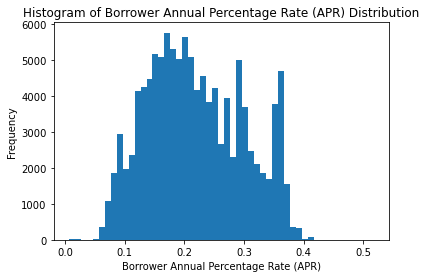

In [8]:
# Creating the histogram for the BorrowerAPR data
create_hist(variable='BorrowerAPR', variable_name='Borrower Annual Percentage Rate (APR)', bin_size=0.01)

## Distribution of Credit Grade
The distribution increases steadily from the AA grade and peaks at the C grade then a steady decline from the C grade to the lowest level HR.

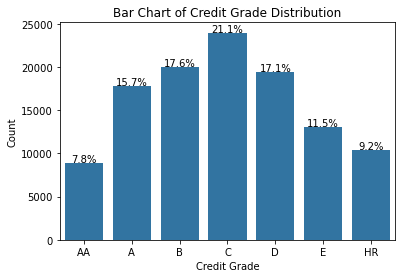

In [9]:
# Creating a bar chart to display the distribution of the Credit Grades
to_categorical(variable='CreditGrade', ordered_list=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
create_bar_chart(variable='CreditGrade', variable_name='Credit Grade')

## Income Range Distribution

From the visualization below, it can be concluded that the most common borrowers have income ranges of USD25,000-49,999 and USD50,000-74,999.

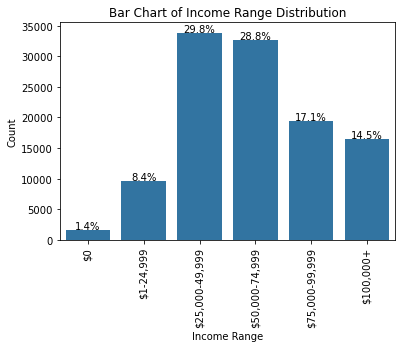

In [10]:
# First, we need to convert the data to the categorical (ordinal) datatype
to_categorical(variable='IncomeRangeAdj', ordered_list=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'])
# Bar chart for income range
create_bar_chart(variable='IncomeRangeAdj', variable_name='Income Range', rotate_labels=True)

## Borrower APR Vs. Credit Grade

This visualization shows that generally, the higher the credit grade level, the lower the Borrower APR.

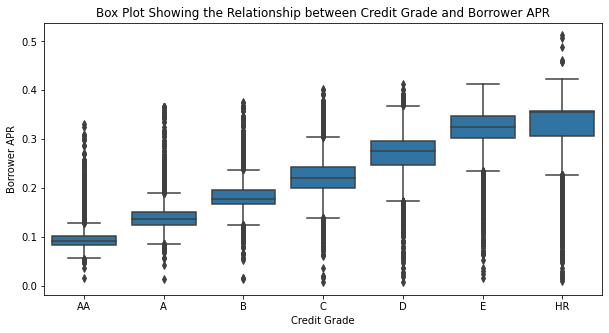

In [11]:
# Creating a box plot to show the relationship between the Borrower APR and the Credit Grades
plt.figure(figsize=(10, 5))
create_box_plot(x='CreditGrade', x_name='Credit Grade', y='BorrowerAPR', y_name='Borrower APR')

## Borrower APR Vs. Income Range

This visualization shows that starting from the `$1-24,999` range, the Borrower APR generally decreases with increasing income range.<br>
The `$0` range doesn't follow the trend probably because borrowers that are meant to be in other income ranges didn't fill in their StatedMonthlyIncome correctly.

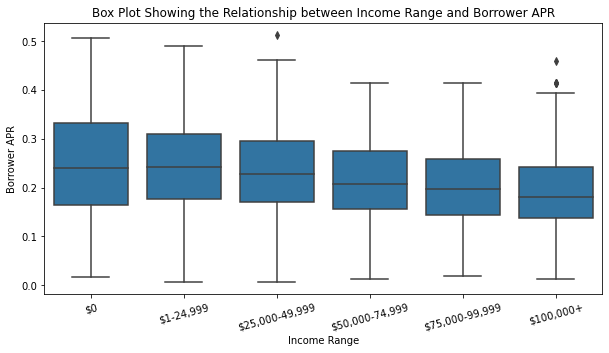

In [12]:
# Creating a box plot to show the relationship between the Borrower APR and the Income Range
plt.figure(figsize=(10, 5))
create_box_plot(x='IncomeRangeAdj', x_name='Income Range', y='BorrowerAPR', y_name='Borrower APR', tilt_label=True)

## Borrower APR Vs. Income Range by Credit Grade

When the relationship between Borrower APR and Income Range is filtered by credit grade, it shows the Borrower APR in each credit grade are very similar.

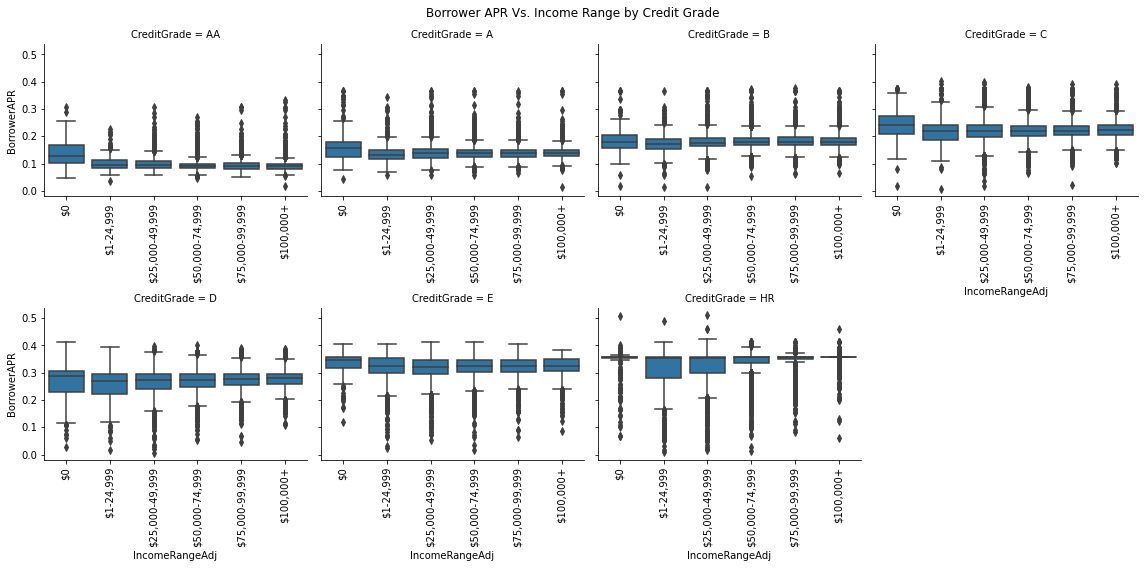

In [13]:
# plotting another variant
g = sb.FacetGrid(data = loan_df, col = 'CreditGrade', height = 4, col_wrap=4, sharex=False) 
plt.suptitle('Borrower APR Vs. Income Range by Credit Grade')
g1 = g.map(sb.boxplot, 'IncomeRangeAdj', 'BorrowerAPR', order=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'])
plt.xticks(rotation=90);
# Rotate the x-axes labels
for axes in g.axes.flat:
    new_labels = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

## Borrower APR Vs. Credit Grade by Income Range

There is a strong relationship between credit grade and borrower APR. The visual below shows how the credit grade A borrowers always have a low Borrower APR regardless of the income range.

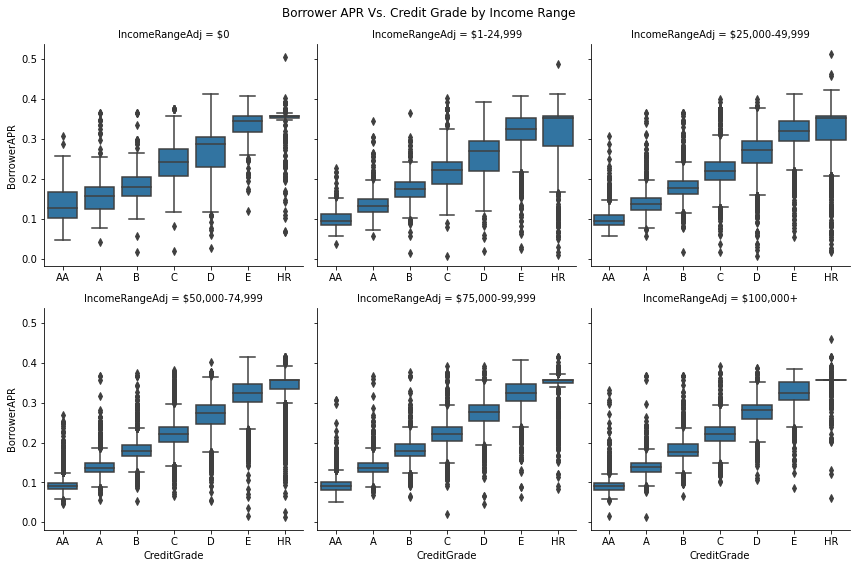

In [14]:
g = sb.FacetGrid(data = loan_df, col = 'IncomeRangeAdj', height = 4, col_wrap=3, sharex=False)
plt.suptitle('Borrower APR Vs. Credit Grade by Income Range')
g.map(sb.boxplot, 'CreditGrade', 'BorrowerAPR', order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);

In [15]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 800177 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP_ELITE\anaconda3\envs\data_analysis_1\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP_ELITE\anaconda3\envs\data_analysis_1\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP_ELITE\anaconda3\envs\data_analysis_1\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\HP_ELITE\anaconda3\envs\data_analysis_1\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\HP_ELITE\anaconda3\envs\data_analysis_1